## Sonar, Mines vs. Rocks


### SUMMARY


This is the data set used by Gorman and Sejnowski in their study of the classification of sonar signals using a neural network [1](https://www.sciencedirect.com/science/article/abs/pii/0893608088900238).  The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.
 
#### SOURCE


The data set was contributed to the benchmark collection by Terry Sejnowski, now at the Salk Institute and the University of California at San Deigo.  The data set was developed in collaboration with R. Paul Gorman of Allied-Signal Aerospace Technology Center.


#### PROBLEM DESCRIPTION:
 

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90
degrees for the cylinder and 180 degrees for the rock.
 
Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.
 
The label (target variable, Class) associated with each record contains the label "R" for rock if the object is a rock and "M" if it is a mine (metal cylinder). This is binary classification problem and we are going to predict metal or rock objects from sonar return data.

This data set can be used in a number of different ways to test learning speed, quality of ultimate learning, ability to generalize, or combinations of these factors.


### Load Data

In [80]:
# Load libraries
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import pandas as pd
import numpy as np
from numpy import arange
from pandas import read_csv
from pandas import set_option

from matplotlib import pyplot
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 1.0


In [81]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

### Analyze Data


#### Descriptive Statistics

Let's confirm the dimensions of the dataset, e.g. the number of rows and
columns.

In [82]:
# Shape of the dataset
print(dataset.shape)

(208, 61)


We have 208 instances to work with and can confirm the data has 61 attributes including
the Class attribute.

In [7]:
# Data types
set_option('display.max_rows', 500)
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


We can see that all of the attributes are numeric (float) and that the Class value has been
read in as an object.

In [8]:
# Let's peek at the first 100 rows of the data
print(dataset.head(100))

        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10  0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11  0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.05

We can see that the target variable is Class, the last column, and other attributes do not 
have a meaningful name. We are not specifying the names of the attributes this time. 

We cannot see all the columns, but we can see that the data has the same scale. We can also see that
the Class variable (60) has string values.

Let's summarize the distribution of each attribute.

In [10]:
# Description of attributes with precision to 3 places
set_option('precision', 3)
print(dataset.describe())

            0          1        2        3        4        5        6   \
count  208.000  2.080e+02  208.000  208.000  208.000  208.000  208.000   
mean     0.029  3.844e-02    0.044    0.054    0.075    0.105    0.122   
std      0.023  3.296e-02    0.038    0.047    0.056    0.059    0.062   
min      0.002  6.000e-04    0.002    0.006    0.007    0.010    0.003   
25%      0.013  1.645e-02    0.019    0.024    0.038    0.067    0.081   
50%      0.023  3.080e-02    0.034    0.044    0.062    0.092    0.107   
75%      0.036  4.795e-02    0.058    0.065    0.100    0.134    0.154   
max      0.137  2.339e-01    0.306    0.426    0.401    0.382    0.373   

            7        8        9   ...       50         51         52       53  \
count  208.000  208.000  208.000  ...  208.000  2.080e+02  2.080e+02  208.000   
mean     0.135    0.178    0.208  ...    0.016  1.342e-02  1.071e-02    0.011   
std      0.085    0.118    0.134  ...    0.012  9.634e-03  7.060e-03    0.007   
min      

It is interesting that the data has differing mean values but similar range. There may be some benefit from standardizing the data.

### Class Distribution


Let's take a quick look at the breakdown of Class values.

In [11]:
# Class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


We can see that the classes are reasonably balanced between Mine(s) and Rock(s).

### Data Visualisations


#### Unimodal Data Visualisations

Let's look at visualizations of individual attributes. We will use histograms of each
attribute to get a sense of the data distributions.

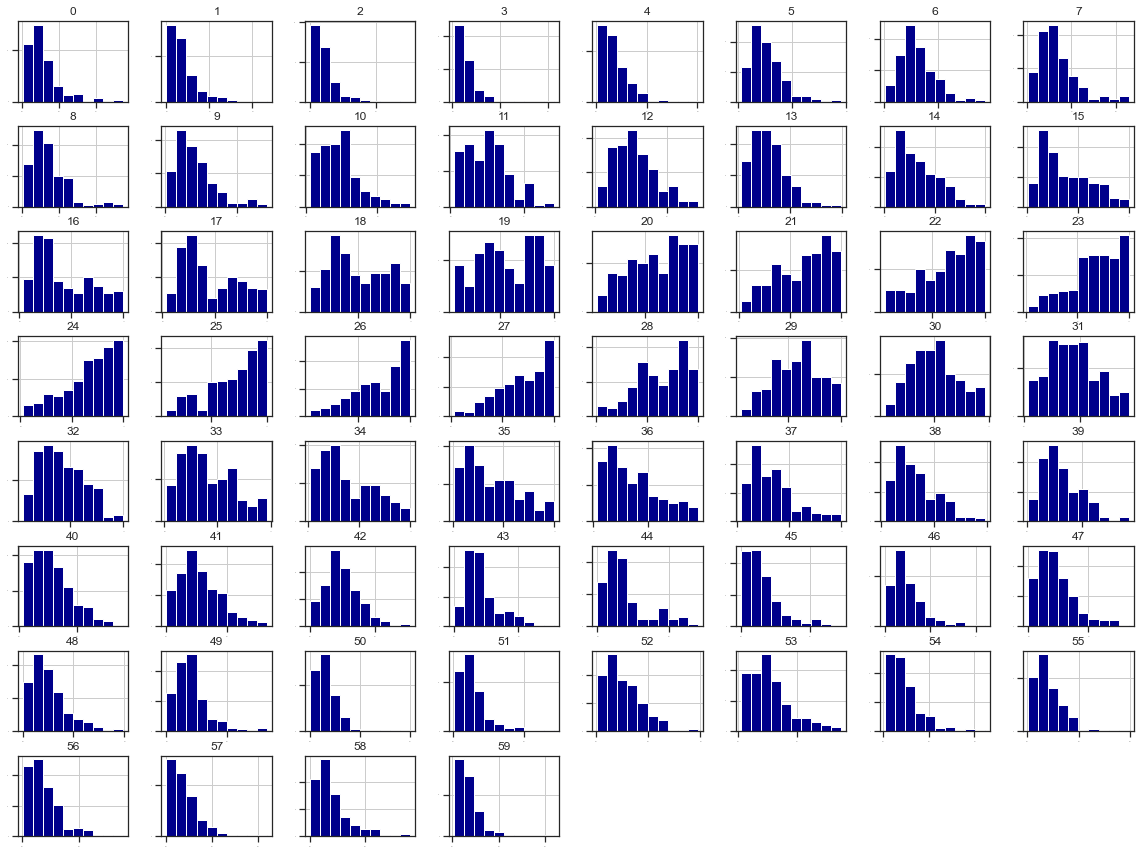

In [12]:
# Histograms
dataset.hist(sharex=False, sharey=False, color = 'darkblue', xlabelsize=1, ylabelsize=1)
pyplot.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponential-like distributions for other attributes.


Let's take a look at the same perspective of the data using density plots.

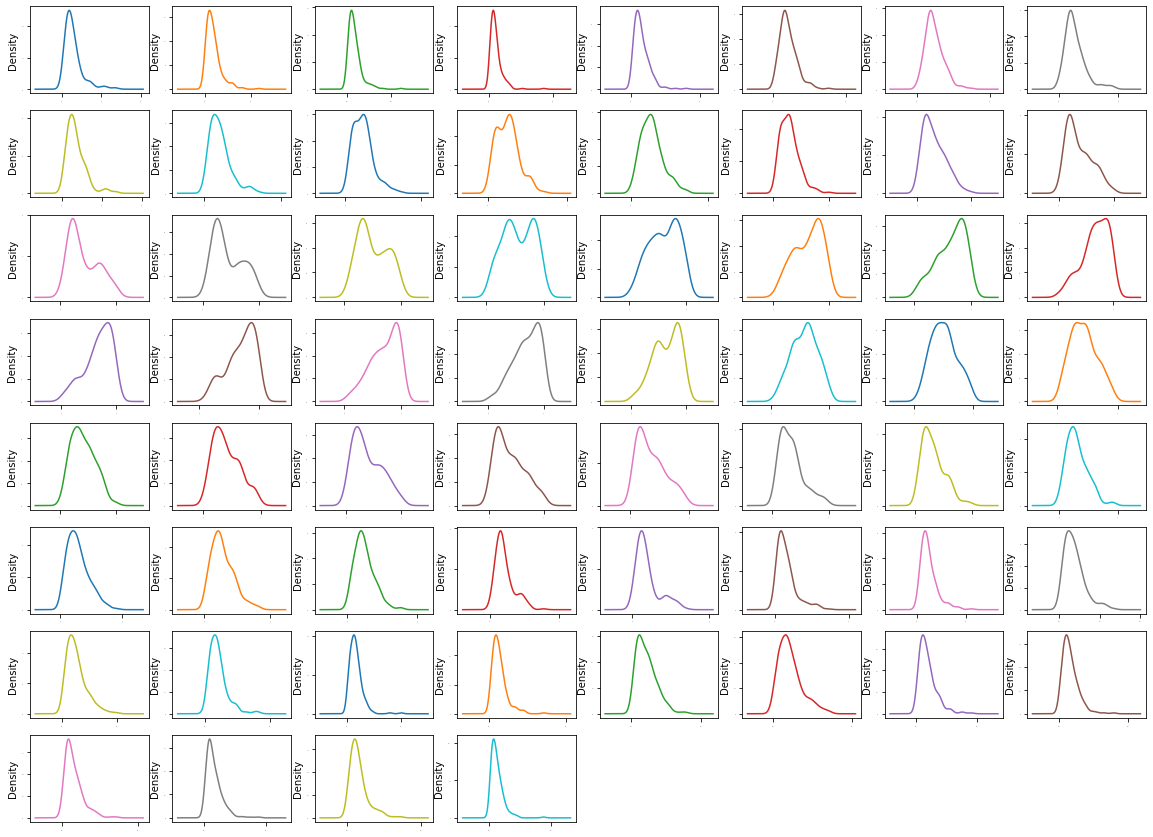

In [10]:
# Density plots
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1)
pyplot.show()

This is useful, we can see that many of the attributes have a skewed distribution. A power
transform like a Box-Cox transform that can correct for the skew in distributions might be
useful.


### Multimodal Data Visualisations


Let's visualize the correlations between the attributes.

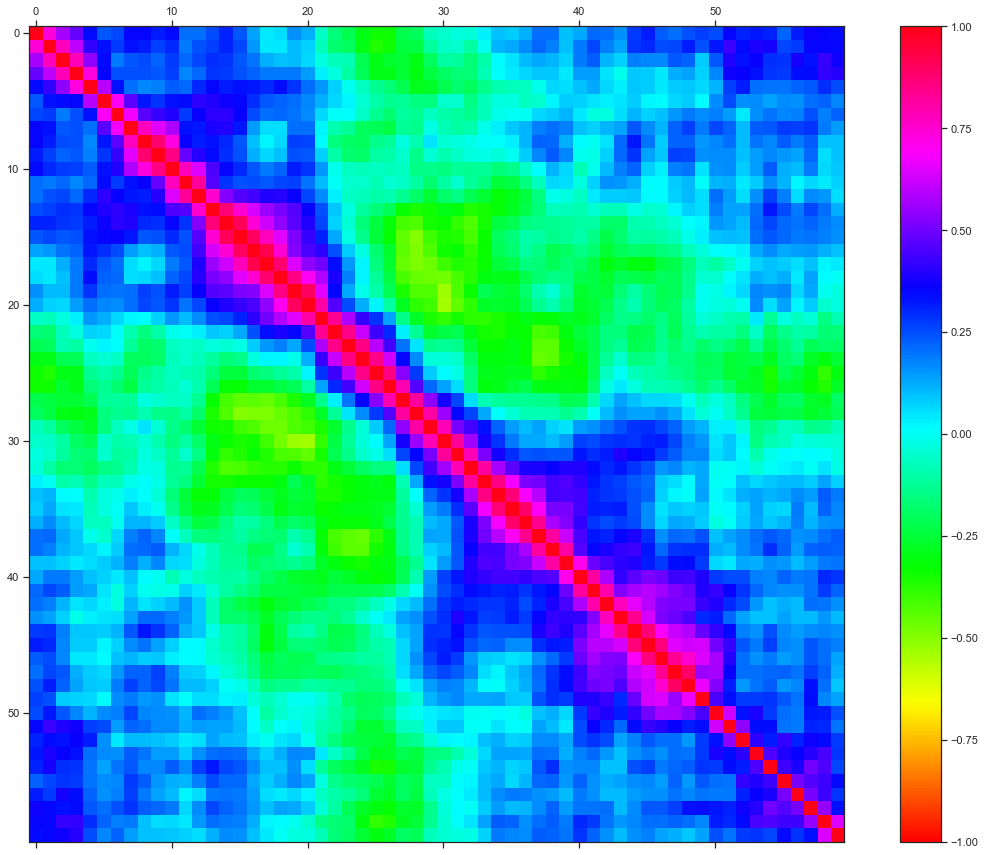

In [72]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none', cmap = 'hsv')
fig.colorbar(cax)
pyplot.show()

It looks like there is also some structure in the order of the attributes. The pink around
the diagonal suggests that attributes that are next to each other are generally more 
correlated with each other. The green patches also suggest some moderate negative 
correlations the further attributes are away from each other in the ordering. 
This makes sense if the order of the attributes refers to the angle of sensors for the sonar chirp.

### Validation Dataset


It is a good idea to use a validation hold-out set. This is a sample of the data that we 
hold back from our analysis and modeling. We use it right at the end of our project to 
confirm the accuracy of our final model.  We will use 80% of the dataset
for modeling and hold back 20% for validation.

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

### Evaluate Algorithms


#### Baseline

We don't know what algorithms will do well on this dataset. Gut feel suggests distance based algorithms like k-Nearest Neighbors and Support Vector Machines may do well. Let's design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is. More useful on binary classification problems like this one.

In [43]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

We will select a suite of different algorithms capable of working on this classification
problem. The six algorithms selected include:

 - Linear Algorithms: Logistic Regression (LR) and Linear Discriminant Analysis (LDA)   
 - Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector
   Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN)

In [49]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769485 (0.100510)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.740809 (0.101556)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


The algorithms all use default tuning parameters. The output displays the mean and 
standard deviation of accuracy for each algorithm.The results suggest that both KNN and SVM may be worth further study.

These are just mean accuracy values. It is always wise to look at the distribution of 
accuracy values calculated across cross validation folds. We can do that graphically 
using box and whisker plots.

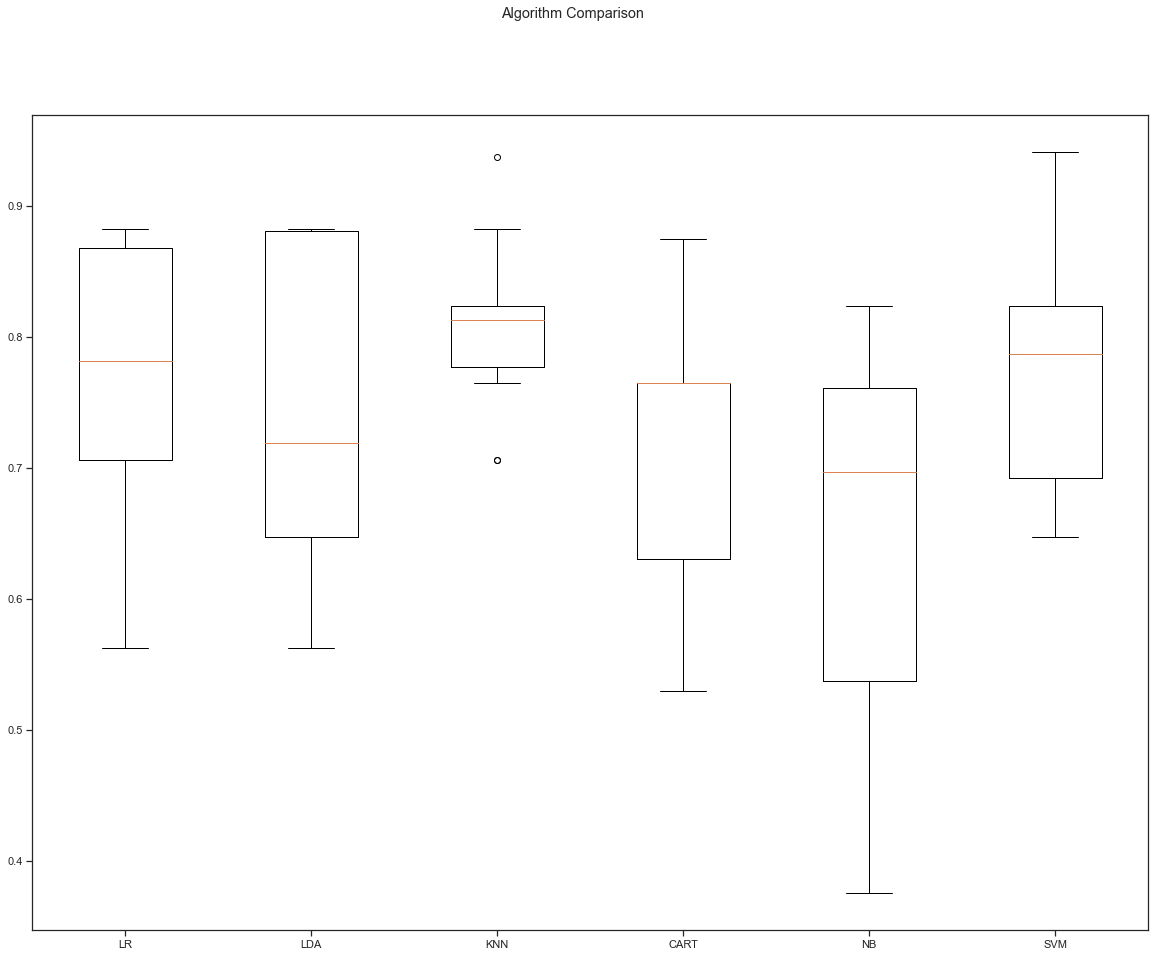

In [28]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results show a tight distribution for KNN which is encouraging, suggesting low variance.
The poor results for NB are surprising.

It is possible that the varied distribution of the attributes is having an effect on 
the accuracy of algorithms. Now we are going to repeat this spot-check with a standardized
copy of the training dataset.

#### Standardize Data

We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [29]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.740441 (0.094668)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.723529 (0.084508)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


We can see that KNN is still doing well, even better than before. We can also see that the standardization of the data has lifted
the skill of SVM to be the most accurate algorithm tested so far.
Again, we should plot the distribution of the accuracy scores using box and whisker plots.

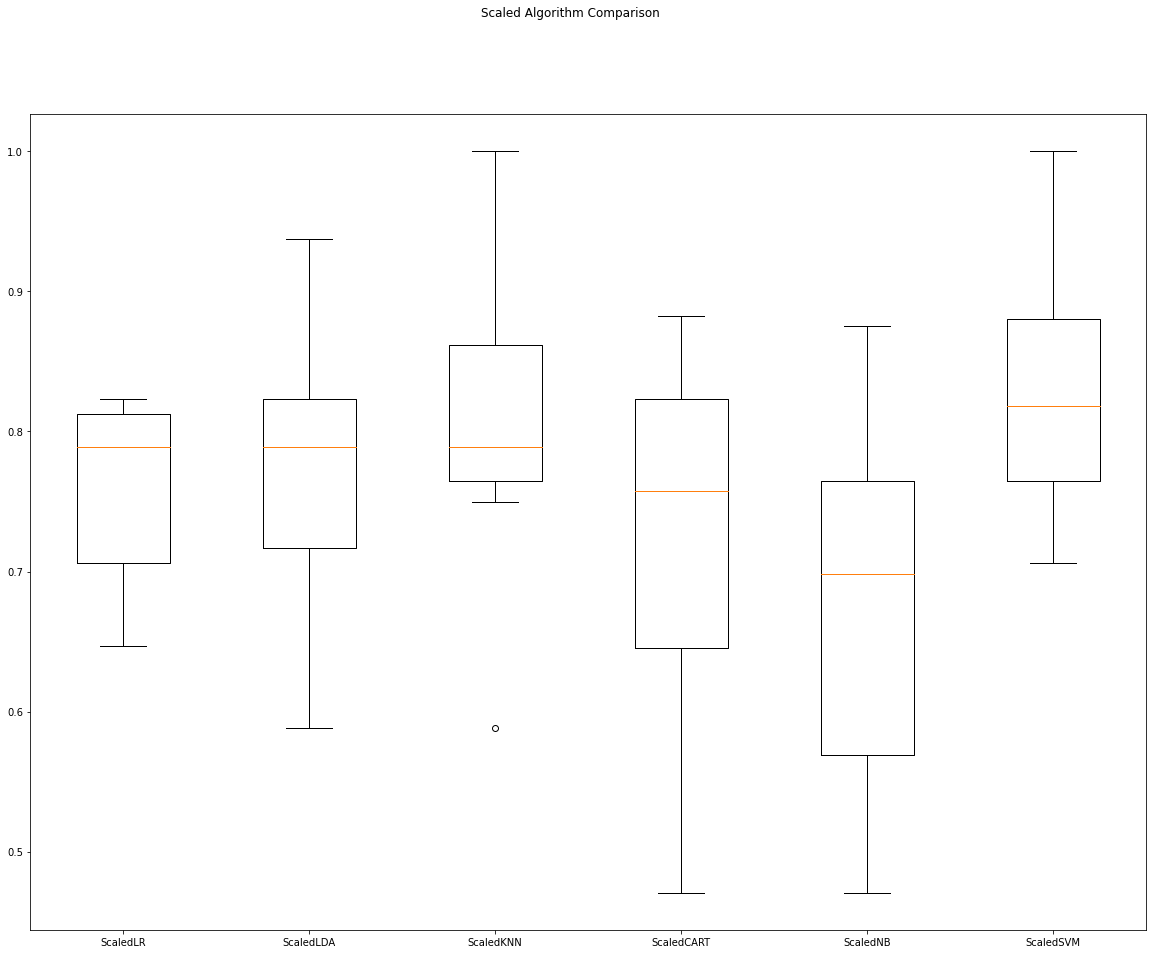

In [17]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results suggest to dig deeper into the SVM and KNN algorithms. It is very likely that
configuration beyond the default may yield even more accurate models.

### Algorithm Tuning


#### Tunning KNN

We can start by tuning the number of neighbors for KNN. The default number of neighbors
is 7. We will try all odd values of k from 1 to 21, covering the default value of 7. 
Each k value is evaluated using 10-fold cross validation on the training standardized dataset.

In [30]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850000 using {'n_neighbors': 1}
0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


We can see that the most accurate configuration was KNN with K=1. This is interesting as 
the algorithm will make predictions using the most similar instance in the training dataset alone.

#### Tuning SVM


We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial
Basis Function (RBF) kernel with a C value set to 1.0. Like with KNN, we will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).

In [31]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.758824 (0.047088) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'

The output prints out the best configuration, the accuracy as well as the accuracies
for all configuration combinations.

We can see the most accurate configuration was SVM with an RBF kernel and a C value
of 2.0. The accuracy 87.2426% is seemingly better than what KNN could achieve.

### Ensamble Methods


Another way that we can improve the performance of algorithms on this problem is by using
ensemble methods. We will evaluate four different ensemble machine learning
algorithms, two boosting and two bagging methods:

 - Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM)
 - Bagging Methods: Random Forests (RF) and Extra Trees (ET)

We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [32]:
# Ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.819853 (0.058293)
GBM: 0.853676 (0.113278)
RF: 0.806985 (0.100459)
ET: 0.854044 (0.087714)


We can see that both GBM and ET provide strong accuracy scores in the high 80's (%) with default configurations. We can plot the distribution of accuracy scores 
across the cross validation folds.

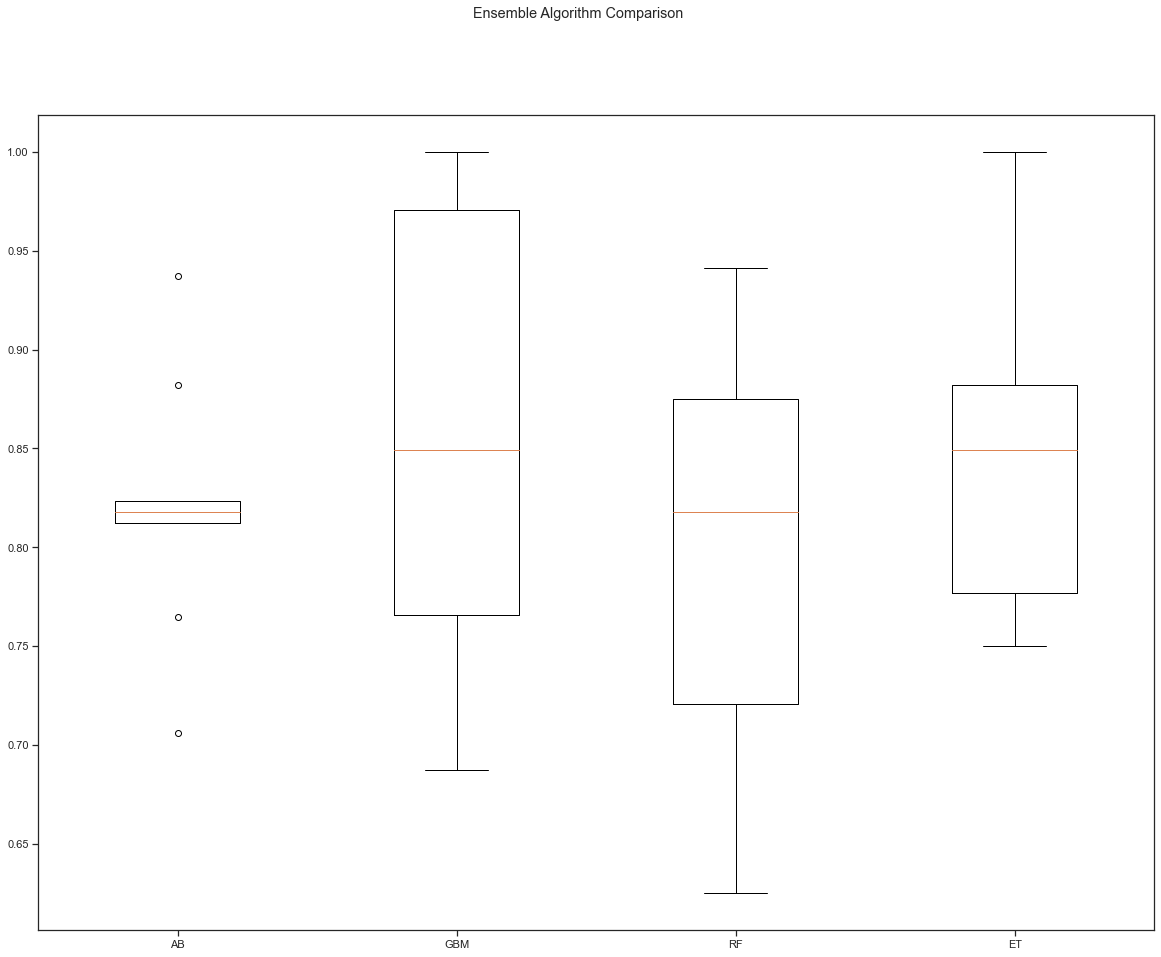

In [34]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The results suggest GBM may be worthy of further study, with a strong mean and a spread
that skews up towards high 90s (%) in accuracy.

In [37]:
# Tune GBM
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

# Summarize the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866176 using {'n_estimators': 300}
0.824632 (0.078749) with: {'n_estimators': 50}
0.841912 (0.088694) with: {'n_estimators': 100}
0.841912 (0.103125) with: {'n_estimators': 150}
0.854044 (0.095744) with: {'n_estimators': 200}
0.854044 (0.095744) with: {'n_estimators': 250}
0.866176 (0.094224) with: {'n_estimators': 300}
0.859559 (0.126855) with: {'n_estimators': 350}
0.859926 (0.113346) with: {'n_estimators': 400}


### Finalize the Model


The SVM showed the most promise as a low complexity and stable model for this problem. In
this section we will finalize the model by training it on the entire training dataset and make
predictions for the hold-out validation dataset to con rm our  ndings. A part of the  findings was
that SVM performs better when the dataset is standardized so that all attributes have a mean
value of zero and a standard deviation of one. We can calculate this from the entire training
dataset and apply the same transform to the input attributes from the validation dataset.

In [48]:
# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0)
model.fit(rescaledX, Y_train)
# Estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [ ]:
We can see that we achieve an accuracy of nearly 86% on the held-out validation dataset. A
score that matches closely to our expectations estimated above during the tuning of SVM.

### References


[1. Gorman, R. P., and Sejnowski, T. J. (1988). "Analysis of Hidden Units in a Layered Network Trained to Classify Sonar Targets" in Neural Networks, Vol. 1, pp. 75-89](https://www.sciencedirect.com/science/article/abs/pii/0893608088900238)